# Wine Time
By:  Data Scientist Corey Baughman & DeAdrien Hill

## Goal:
* Discover drivers of wine quality scores in the wine quality dataset
* Identify if clustering has a benefit in modeling
* Use drivers to develop a machine learning model that predicts wine quality better than baseline

# Imports

In [1]:
#Modules for data processing
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import acquire
import prepare
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


# Acquire

* Data acquired from Data.World Wine Quality Dataset
* Dataset contained 6497 rows and 12 columns before cleaning
* The colomn is_red was added to verify wine types
* Each row represents a red or white wine
* Each column represents a feature of the wine

# Prepare

* Dataset was clean with no missing values 
* Removed white space in column names
* Checked for and removed outliers
* Split the data for modeling

# Data Dictionary

### Feature                           Discription

**fixed acidity**:           most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

**volatile acidity**:        the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste',


**citric acid**:             found in small quantities, citric acid can add freshness and flavor to wines

**residual sugar**:          the amount of sugar remaining after fermentation stops its rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**chlorides**:               the amount of salt in the wine','the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

**free sulfur dioxide**:     amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
    
**total sulfur dioxide**:    the density of water is close to that of water depending on the percent alcohol and sugar content

**density**:                 describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**pH**:                      describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**sulphates**:               a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

**alcohol**:                 the percent alcohol content of the wine','(score between 0 and 10)

**quality**:                 score between 0 and 10
    
**is_red**:                  indicated red or white with 1 or 0

In [2]:
df = acquire.new_wine_data()

In [3]:
#Removed duplicated index from import
df.index.is_unique
df.index.duplicated()
df = df.loc[~df.index.duplicated(), :]

# Data Summary

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,7.280063,0.359076,0.303949,5.246121,0.059166,29.098612,106.603716,0.994797,3.222366,0.545572,10.559234,5.799918,0.326460
std,1.400082,0.175912,0.144303,4.661065,0.037585,17.932544,57.104232,0.003088,0.161953,0.155464,1.206790,0.851181,0.468966
min,3.800000,0.085000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.900000,0.039000,15.000000,60.000000,0.992340,3.110000,0.440000,9.500000,5.000000,0.000000
50%,7.000000,0.310000,0.300000,2.800000,0.050000,27.000000,110.000000,0.995200,3.210000,0.520000,10.400000,6.000000,0.000000
75%,7.800000,0.440000,0.370000,7.800000,0.073000,40.000000,147.000000,0.997050,3.320000,0.620000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.230000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


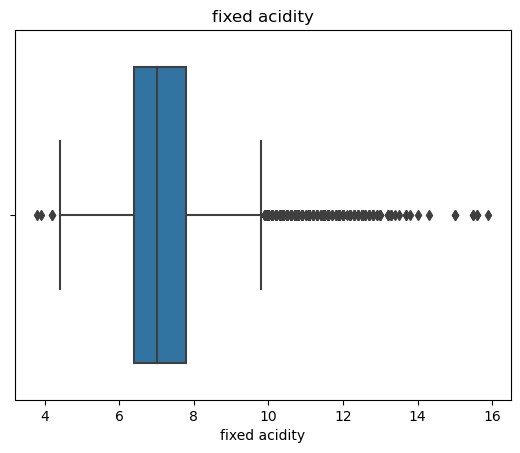

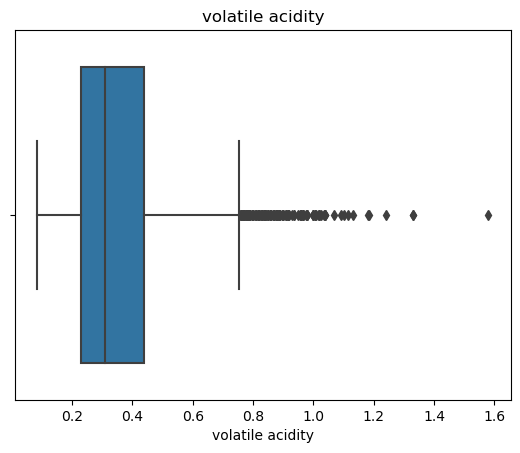

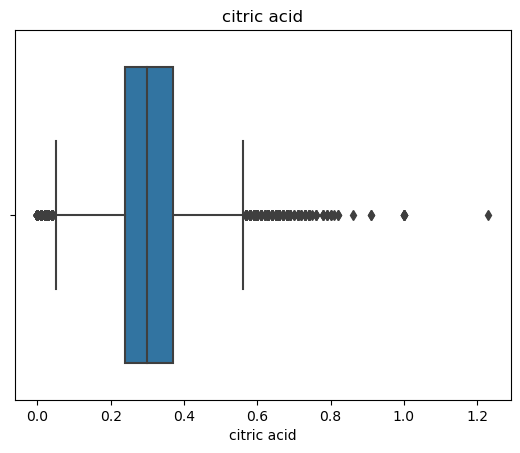

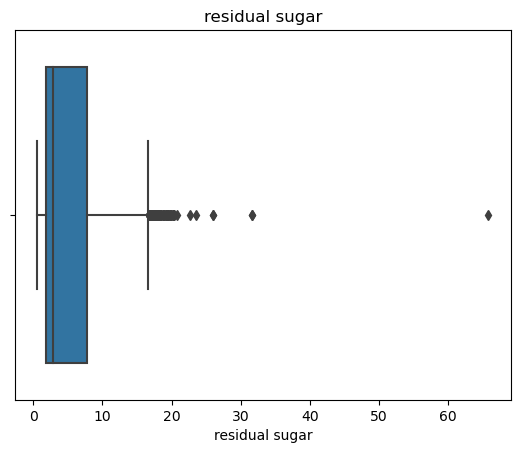

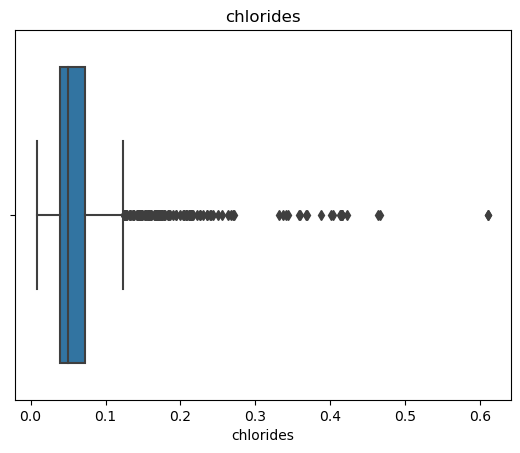

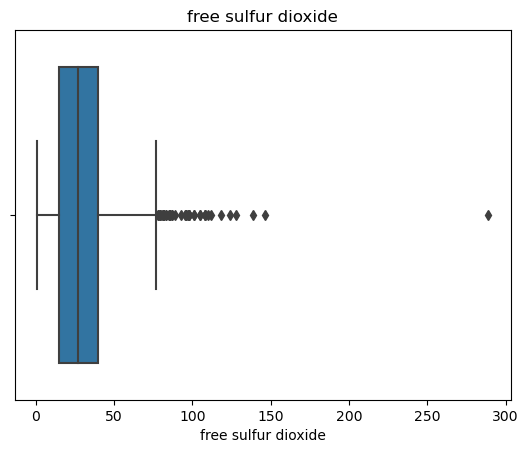

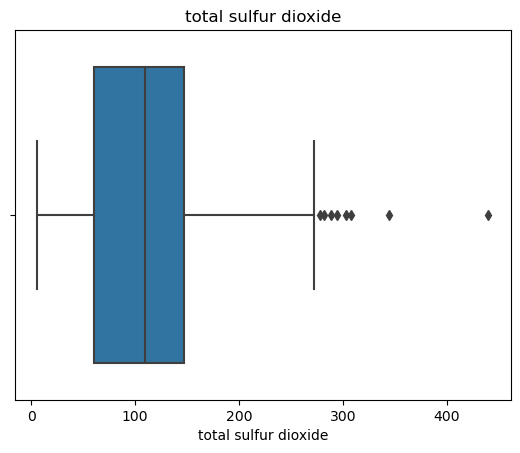

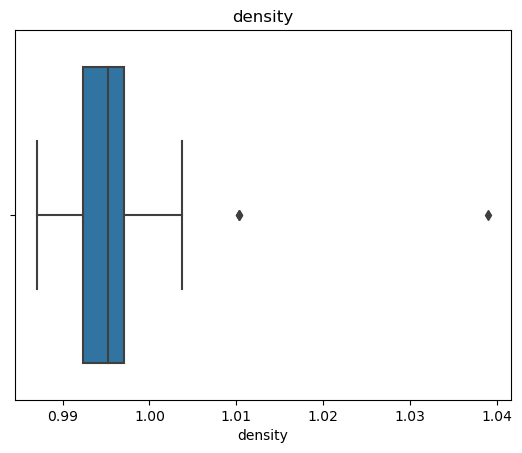

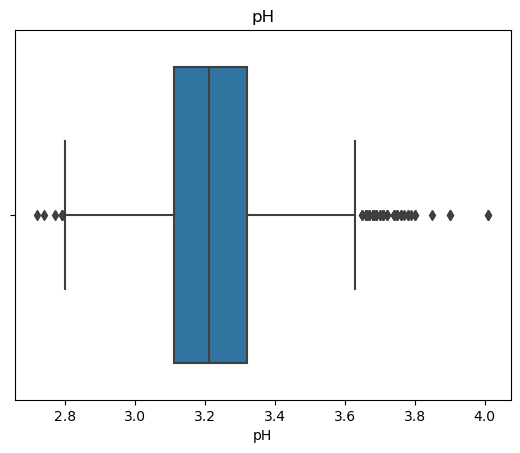

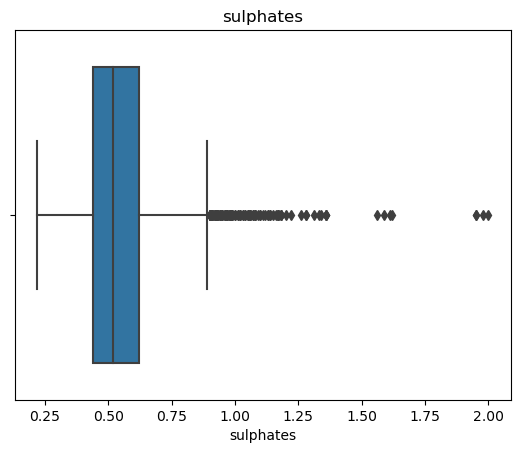

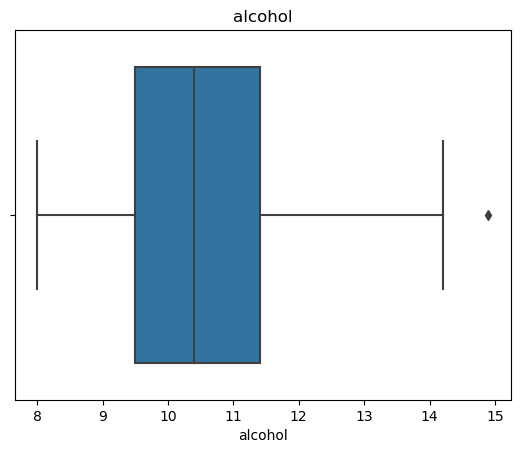

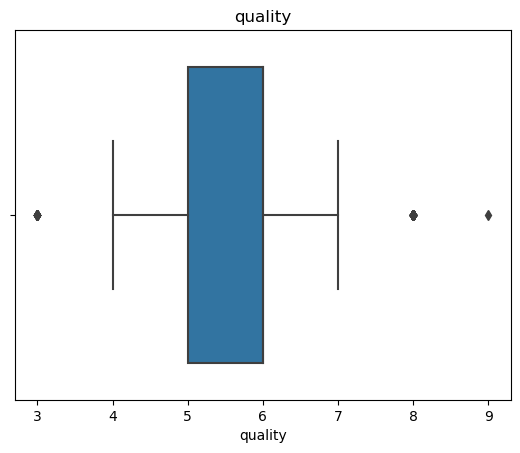

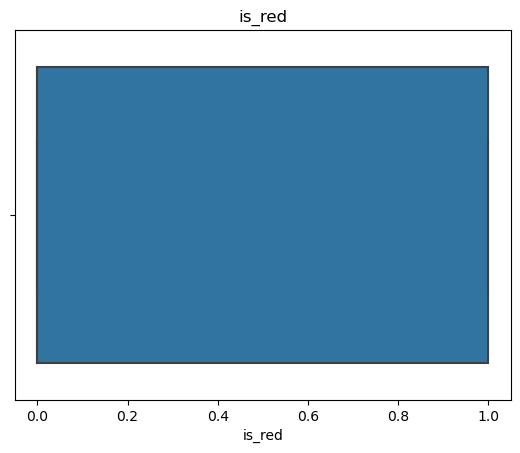

In [5]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [6]:
#Removing whitespace, outliers, and splitting the data
partitions = prepare.prepare(df, target_var='quality')

In [7]:
#Labeling variables for modeling
train = partitions[0]
X_train = partitions[1]
X_validate = partitions[2]
X_test = partitions[3]
y_train = partitions[4]
y_validate = partitions[5]
y_test = partitions[6]

# A look at the data

In [8]:
train.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,is_red
3270,6.4,0.15,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.200000,5,0
3224,5.7,0.15,0.28,3.7,0.045,57.0,151.0,0.99130,3.22,0.27,11.200000,6,0
3213,7.5,0.18,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.600000,6,0
4125,6.3,0.17,0.23,5.7,0.048,44.0,147.0,0.99382,3.08,0.54,10.000000,5,0
4655,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7,0


# Exploration

# What is the distribution of our data?

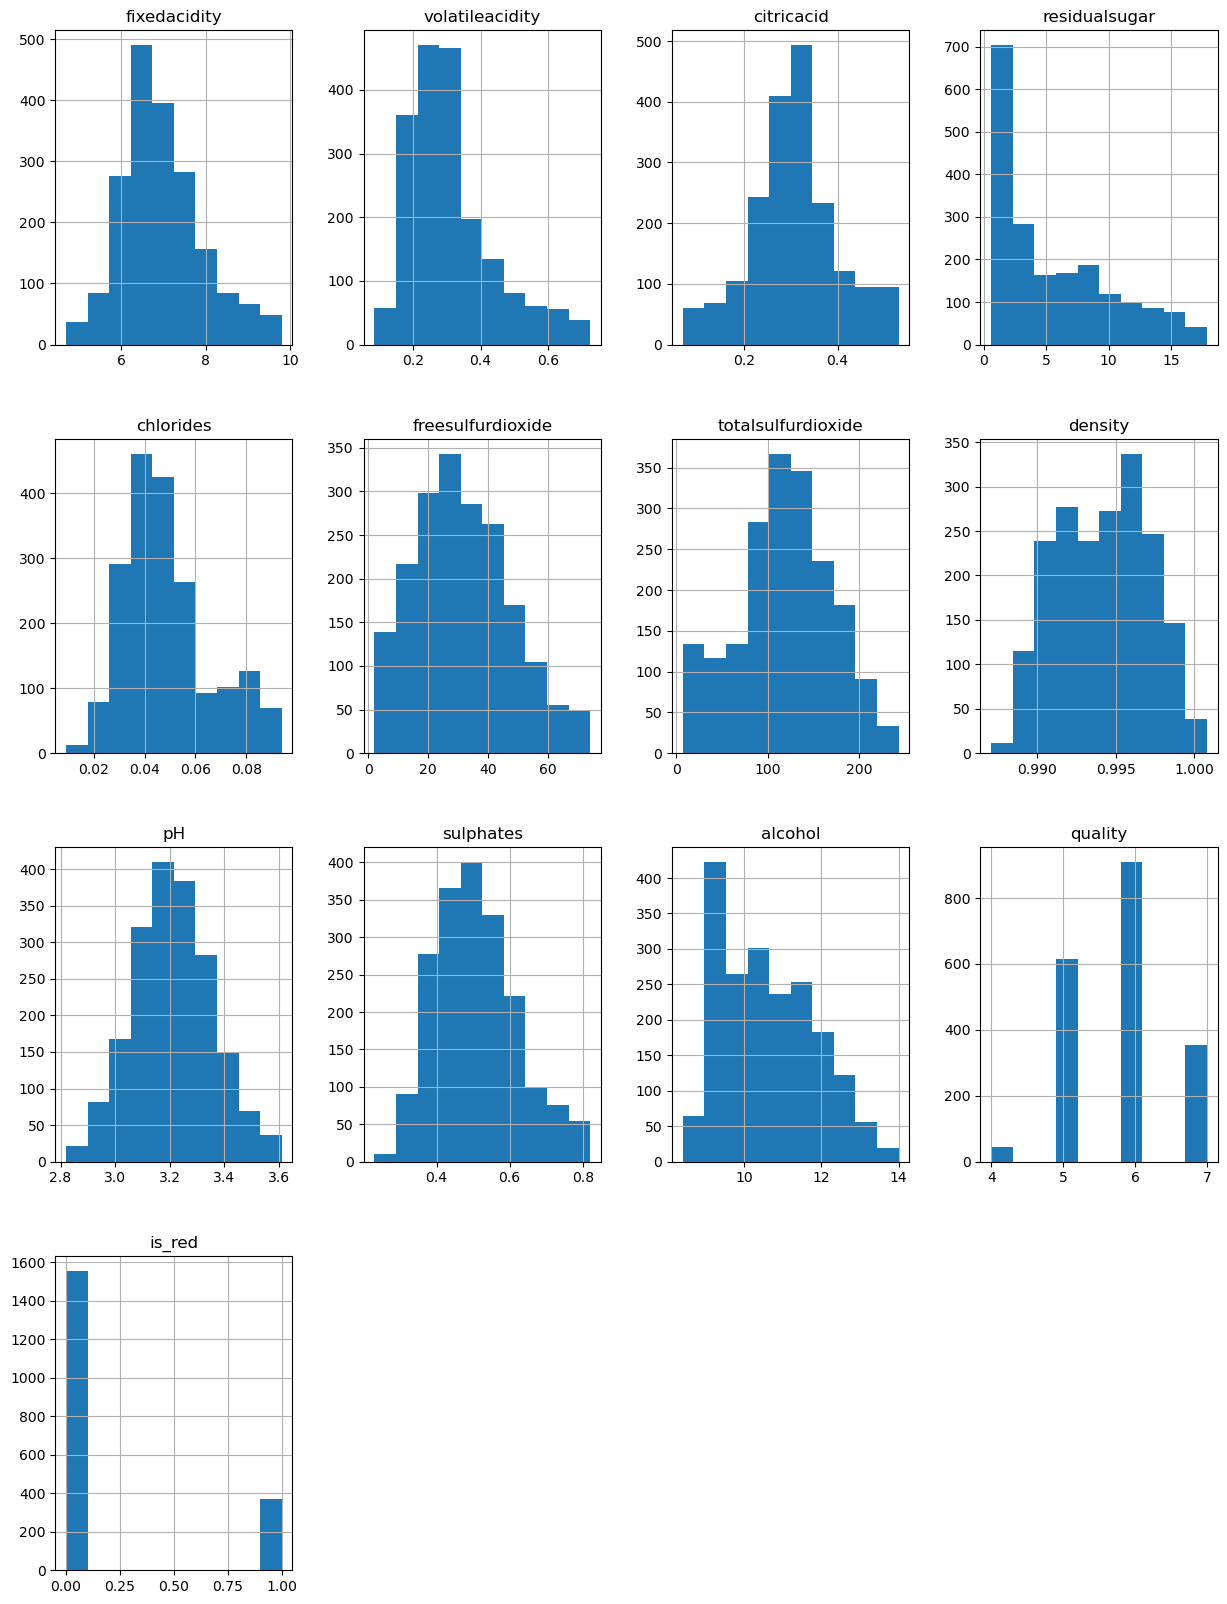

In [9]:
#Hist plot to show distribution of each column in the dataframe
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)
plt.show()

# Do certain drivers affect quality more than others?

In [10]:
# Only compute pearson prod-moment correlations between feature
# columns and target column
target_col_name = 'quality'
feature_target_corr = {}
for col in train:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(train[col], train[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'fixedacidity_quality': -0.1197046778640205, 'volatileacidity_quality': -0.23866720945574935, 'citricacid_quality': 0.08118771974555672, 'residualsugar_quality': -0.0073253151676914265, 'chlorides_quality': -0.2598441710445752, 'freesulfurdioxide_quality': 0.06551222999925611, 'totalsulfurdioxide_quality': -0.10330531731860697, 'density_quality': -0.3083609249549069, 'pH_quality': -0.00028333115769155236, 'sulphates_quality': 0.014618625972843543, 'alcohol_quality': 0.4369958740462614, 'is_red_quality': -0.11900539994309878}


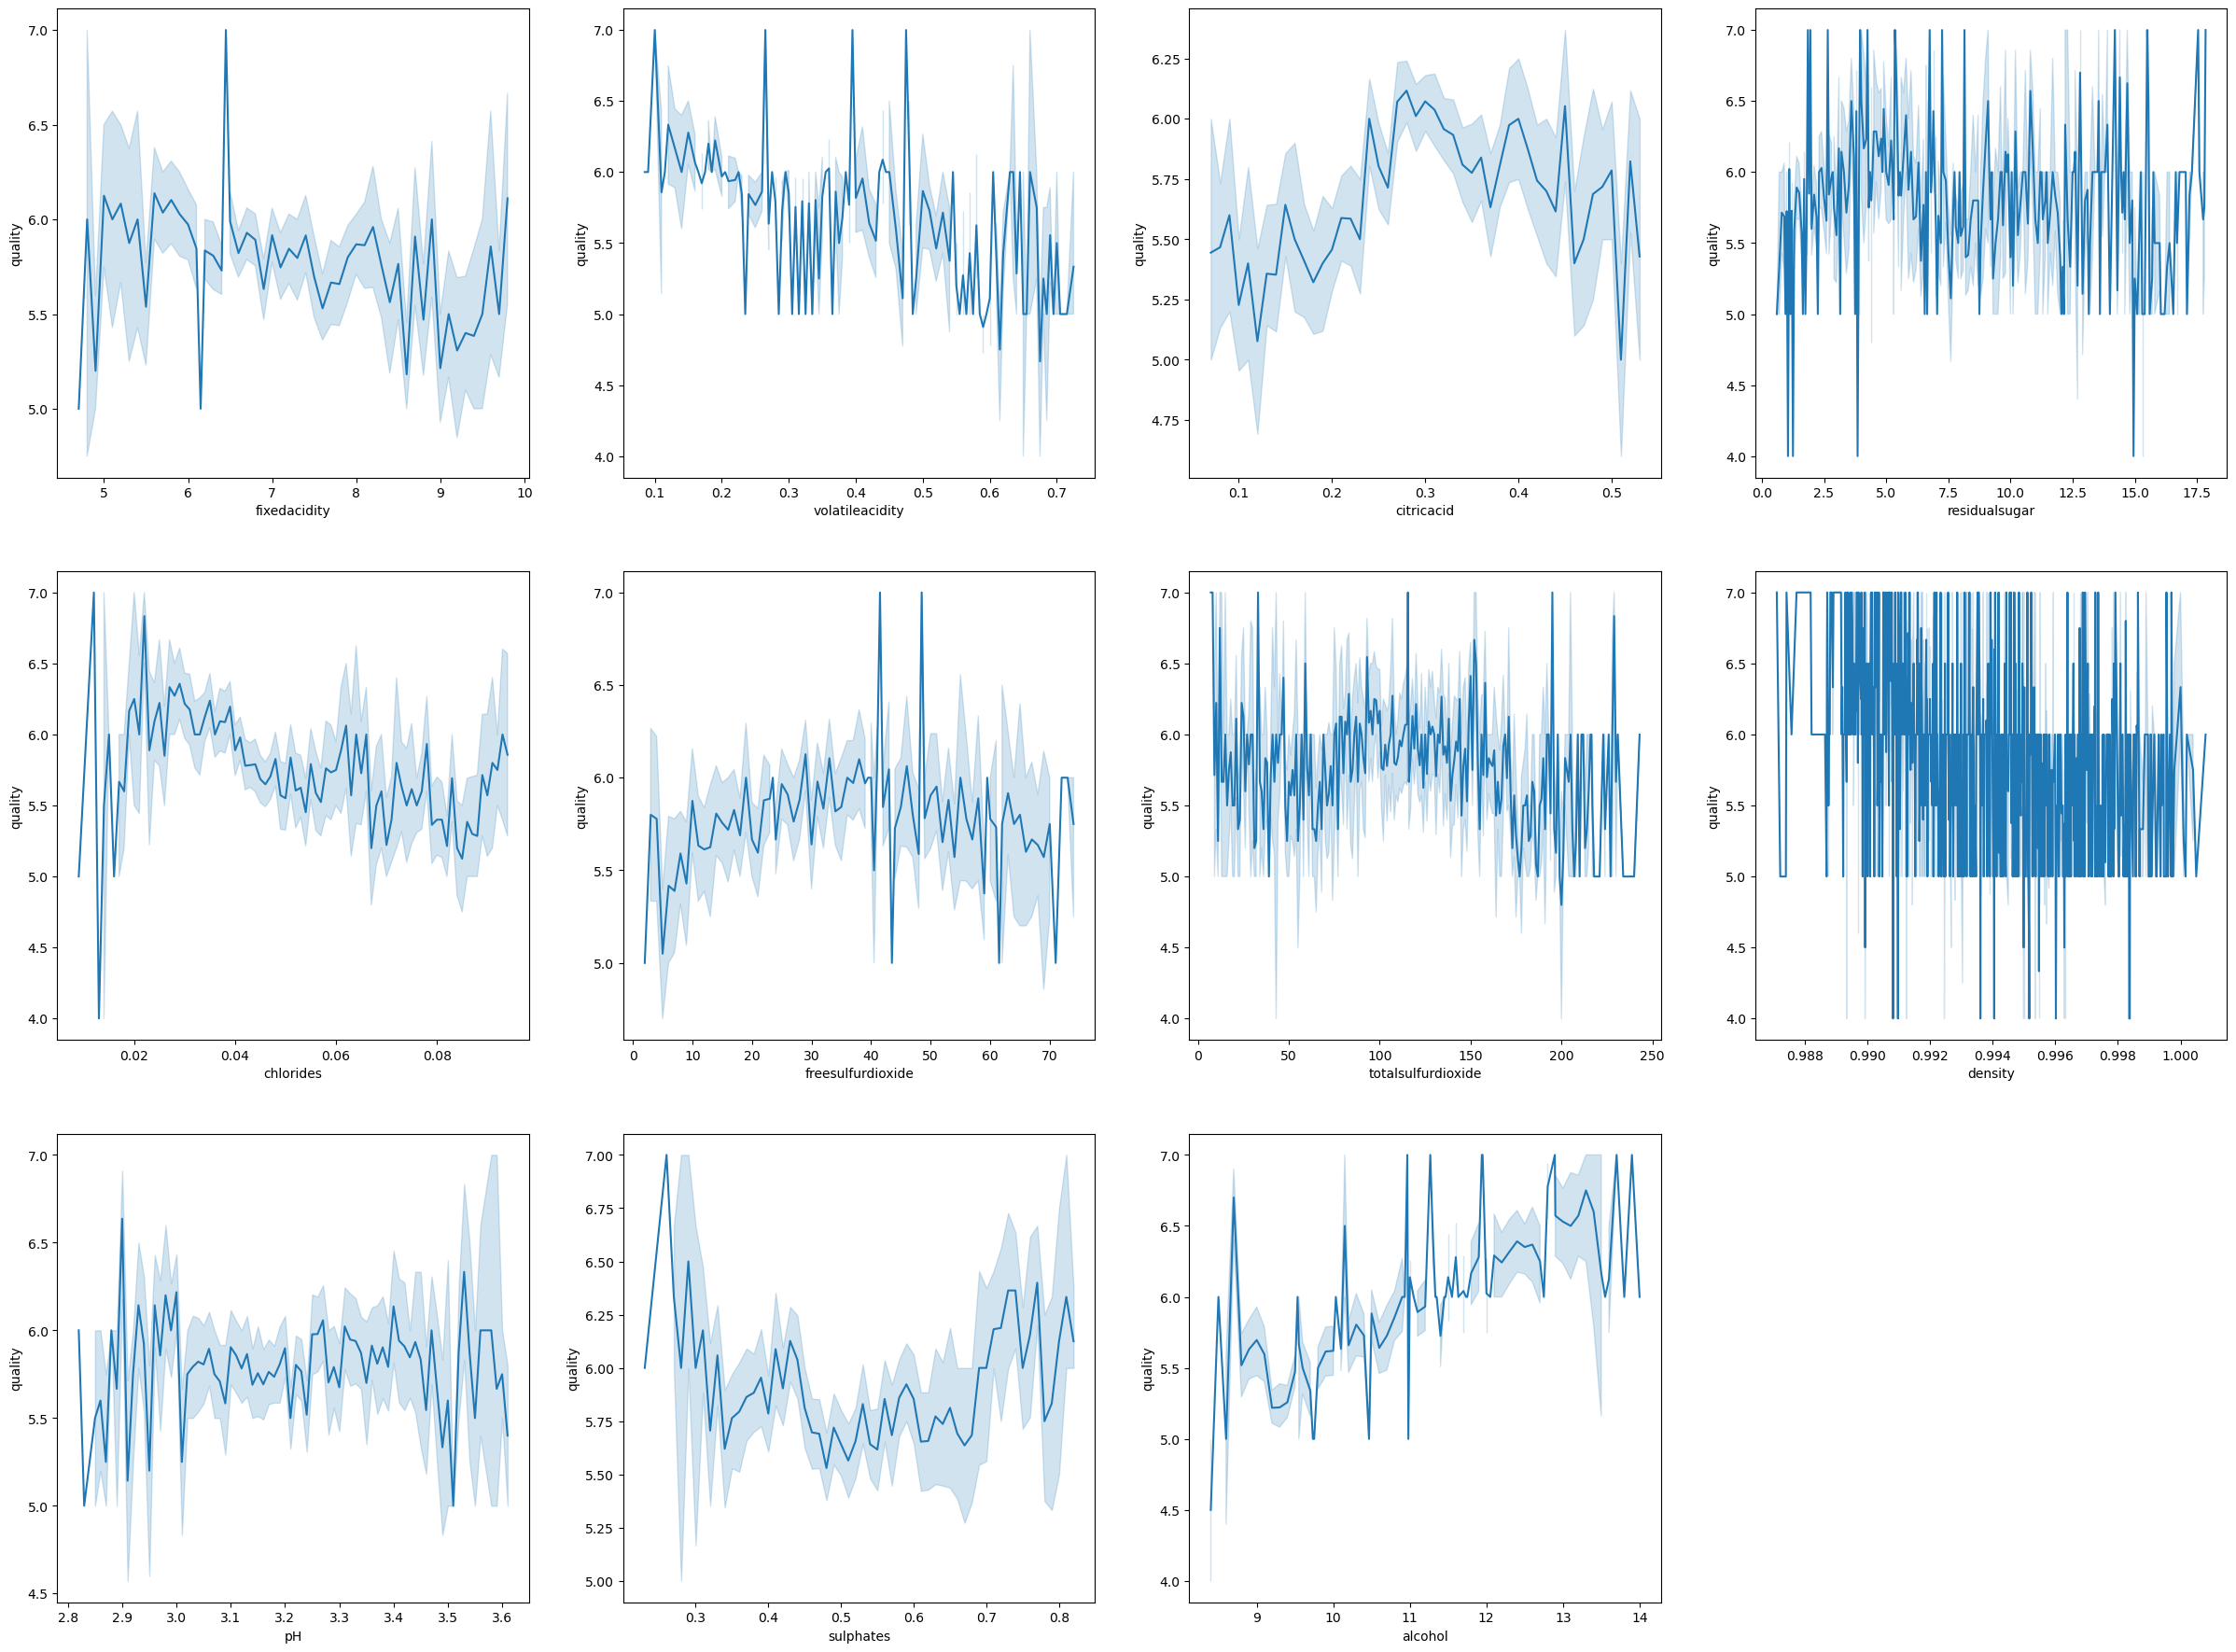

In [11]:
# relation between each feature and the output
feature_name = train.columns[:12]
fig = plt.figure(figsize=(30,30))
for i in range(1,12):
    axs = fig.add_subplot(4,4,i)
    sns.lineplot(x = train[feature_name[i-1]],y = train['quality'])

# Does alcohol effect wine quality?

White = 0 Red = 1


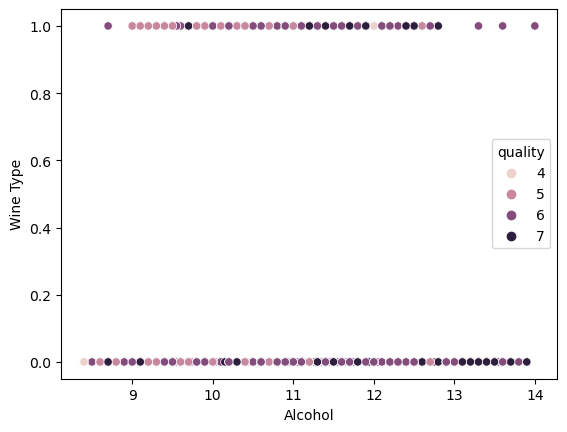

In [12]:
print('White = 0 Red = 1')
sns.scatterplot(x="alcohol", y="is_red", data=train, hue='quality')
plt.xlabel("Alcohol")
plt.ylabel("Wine Type")
plt.show()

# Does density effect wine quality

White = 0 Red = 1


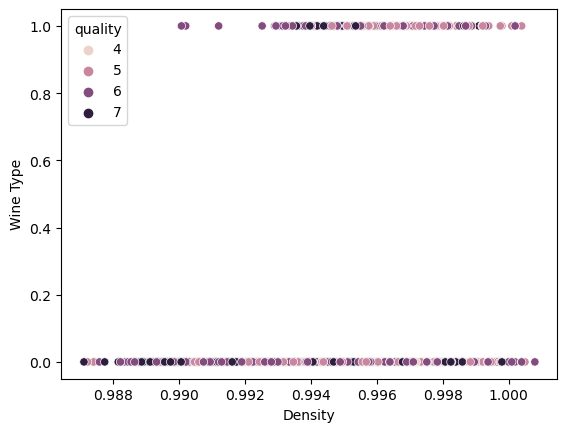

In [13]:
print('White = 0 Red = 1')
sns.scatterplot(x="density", y="is_red", data=train, hue='quality')
plt.xlabel("Density")
plt.ylabel("Wine Type")
plt.show()

# Does chlorides effect wine quality

White = 0 Red = 1


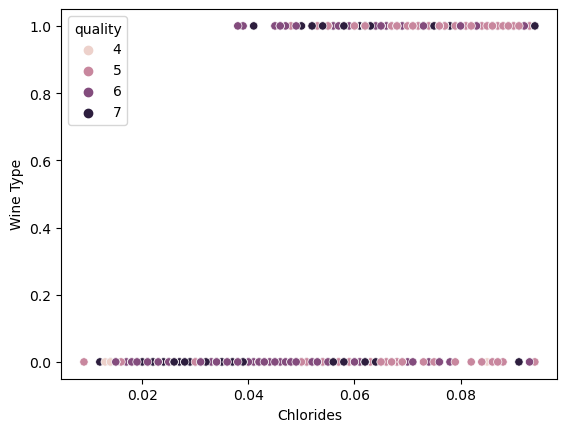

In [14]:
print('White = 0 Red = 1')
sns.scatterplot(x="chlorides", y="is_red", data=train, hue='quality')
plt.xlabel("Chlorides")
plt.ylabel("Wine Type")
plt.show()

# Is there a difference in quality for red or white wine?

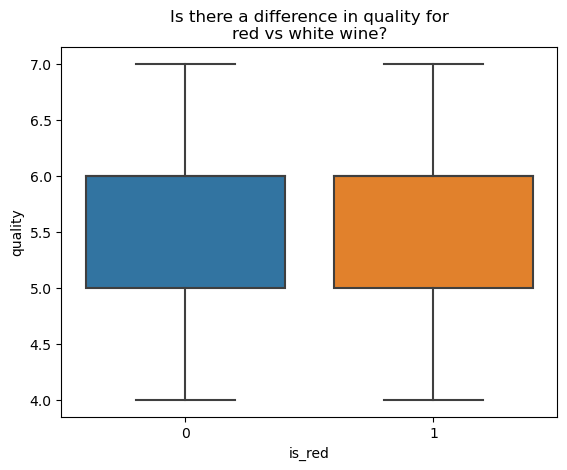

In [15]:
sns.boxplot(x=train.is_red, y=train.quality)
plt.title("Is there a difference in quality for\nred vs white wine?")
plt.show()


**Test the equal variance**
**H0 is that the variances are equal**
* Levene test
* our two groups are 1. where train.is-red==0 and 2) where train.is_red == 1

In [16]:
#Levene test
stats.levene(train[train.is_red==0].quality, 
             train[train.is_red==1].quality)

LeveneResult(statistic=5.615197017103729, pvalue=0.017903701231317275)

In [17]:
#ttest independant
stats.ttest_ind(train[train.is_red==0].quality, 
                train[train.is_red==1].quality, 
                equal_var=True
               )


Ttest_indResult(statistic=5.2532447633664106, pvalue=1.6602138078343052e-07)

# Exploratory Summary

# Modeling

# Does Clustering provide a better insight on the data?
* Performed clustering on multiple target features in modeling. 
* No clear clusters indentified in this dataset
* Sample work in dummy notebook.

In [18]:
# the variables that still need scaling
scaled_vars = ['alcohol', 'volatileacidity', 'sulphates', 'density','chlorides','freesulfurdioxide']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [19]:
X[0].describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,is_red,scaled_alcohol,scaled_volatileacidity,scaled_sulphates,scaled_density,scaled_chlorides,scaled_freesulfurdioxide
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,6.979667,0.312730,0.305283,5.594514,0.048656,31.359074,118.887415,0.994192,3.209745,0.508190,10.614065,0.191368,0.395369,0.355828,0.471509,0.517320,0.466544,0.407765
std,0.938399,0.127468,0.092177,4.496800,0.016937,15.807872,50.902139,0.002878,0.145856,0.113326,1.191927,0.393480,0.212844,0.199169,0.192078,0.210241,0.199258,0.219554
min,4.700000,0.085000,0.070000,0.600000,0.009000,2.000000,7.000000,0.987110,2.820000,0.230000,8.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.220000,0.260000,1.900000,0.036000,19.500000,88.000000,0.991720,3.110000,0.430000,9.500000,0.000000,0.196429,0.210938,0.338983,0.336742,0.317647,0.243056
50%,6.800000,0.280000,0.300000,3.700000,0.046000,29.000000,120.000000,0.994450,3.200000,0.500000,10.500000,0.000000,0.375000,0.304688,0.457627,0.536158,0.435294,0.375000
75%,7.500000,0.370000,0.360000,8.300000,0.056000,42.000000,152.500000,0.996455,3.310000,0.580000,11.400000,0.000000,0.535714,0.445312,0.593220,0.682615,0.552941,0.555556
max,9.800000,0.725000,0.530000,17.850000,0.094000,74.000000,243.000000,1.000800,3.610000,0.820000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X_train = X[0].iloc[:,0:27]
X_validate = X[1].iloc[:,0:27]
X_test = X[2].iloc[:,0:27]

In [21]:
X_train

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,is_red,scaled_alcohol,scaled_volatileacidity,scaled_sulphates,scaled_density,scaled_chlorides,scaled_freesulfurdioxide
3270,6.4,0.15,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.200000,0,0.321429,0.101562,0.254237,0.332359,0.411765,0.263889
3224,5.7,0.15,0.28,3.7,0.045,57.0,151.0,0.99130,3.22,0.27,11.200000,0,0.500000,0.101562,0.067797,0.306063,0.423529,0.763889
3213,7.5,0.18,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.600000,0,0.392857,0.148438,0.254237,0.408327,0.376471,0.902778
4125,6.3,0.17,0.23,5.7,0.048,44.0,147.0,0.99382,3.08,0.54,10.000000,0,0.285714,0.132812,0.525424,0.490139,0.458824,0.583333
4655,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,0,0.458333,0.320312,0.610169,0.481373,0.458824,0.736111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,6.0,0.25,0.28,7.7,0.053,37.0,132.0,0.99489,3.06,0.50,9.400000,0,0.178571,0.257812,0.457627,0.568298,0.517647,0.486111
3478,6.2,0.36,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.800000,0,0.250000,0.429688,0.559322,0.730460,0.600000,0.277778
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.600000,0,0.392857,0.195312,0.389831,0.265157,0.341176,0.500000
1912,7.9,0.30,0.27,8.5,0.036,20.0,112.0,0.99390,2.96,0.46,11.700000,0,0.589286,0.335938,0.389831,0.495982,0.317647,0.250000


In [22]:
X_train = X_train[['fixedacidity', 'citricacid', 'residualsugar', 'totalsulfurdioxide',
       'pH', 'is_red', 'scaled_alcohol',
       'scaled_volatileacidity', 'scaled_sulphates', 'scaled_density',
       'scaled_chlorides', 'scaled_freesulfurdioxide']]

X_validate = X_validate[['fixedacidity', 'citricacid', 'residualsugar', 'totalsulfurdioxide',
       'pH', 'is_red', 'scaled_alcohol',
       'scaled_volatileacidity', 'scaled_sulphates', 'scaled_density',
       'scaled_chlorides', 'scaled_freesulfurdioxide']]

X_test = X_test[['fixedacidity', 'citricacid', 'residualsugar', 'totalsulfurdioxide',
       'pH','is_red', 'scaled_alcohol',
       'scaled_volatileacidity', 'scaled_sulphates', 'scaled_density',
       'scaled_chlorides', 'scaled_freesulfurdioxide']]

In [23]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict quality_pred_mean
quality_pred_mean = y_train['quality'].mean()
y_train['quality_pred_mean'] = quality_pred_mean
y_validate['quality_pred_mean'] = quality_pred_mean

# 2. compute quality_pred_median
quality_pred_median = y_train['quality'].median()
y_train['quality_pred_median'] = quality_pred_median
y_validate['quality_pred_median'] = quality_pred_median

# 3. RMSE of quality_pred_mean
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# 4. RMSE of quality_pred_median
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)


RMSE using Mean
Train/In-Sample:  0.7513438619598115 
Validate/Out-of-Sample:  0.7655926540479826
RMSE using Median
Train/In-Sample:  0.7733200637231898 
Validate/Out-of-Sample:  0.785474186061959


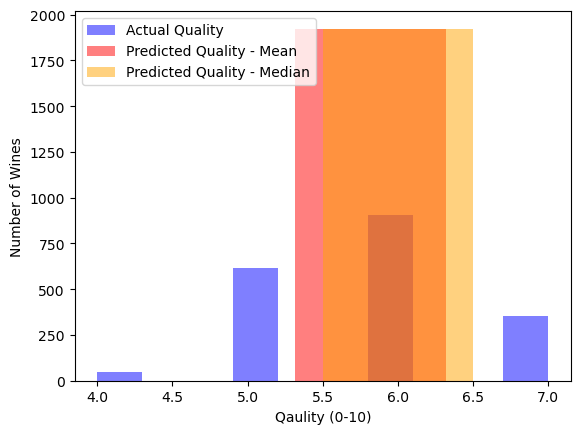

In [24]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.quality, color='blue', alpha=.5, label="Actual Quality")
plt.hist(y_train.quality_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Quality - Mean")
plt.hist(y_train.quality_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Quality - Median")
plt.xlabel("Qaulity (0-10)")
plt.ylabel("Number of Wines")
plt.legend()
plt.show()

In [25]:
# create the model object
lm = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_lm'] = lm.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm)**(1/2)
# predict validate
y_validate['quality_pred_lm'] = lm.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm)**(1/2)
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.6266690536684808 
Validation/Out-of-Sample:  0.6476928838512526


In [26]:
# create the model object
lars = LassoLars(alpha=1.0)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_lars'] = lars.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lars)**(1/2)
# predict validate
y_validate['quality_pred_lars'] = lars.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.7513438619598115 
Validation/Out-of-Sample:  0.7655926540479826


In [27]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_glm'] = glm.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_glm)**(1/2)
# predict validate
y_validate['quality_pred_glm'] = glm.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.6301884813307651 
Validation/Out-of-Sample:  0.6439618654318879


In [28]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.quality)
# predict train
y_train['quality_pred_lm2'] = lm2.predict(X_train_degree2)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm2)**(1/2)
# predict validate
y_validate['quality_pred_lm2'] = lm2.predict(X_validate_degree2)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.5764317168455837 
Validation/Out-of-Sample:  0.6251957945093389


In [29]:
# create the model object
R = Ridge()
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
R.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_R'] = R.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_R)**(1/2)
# predict validate
y_validate['quality_pred_R'] = R.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_R)**(1/2)

print("RMSE for R using Ridge \nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for R using Ridge 
Training/In-Sample:  0.6268602970583622 
Validation/Out-of-Sample:  0.6469403967295616


In [30]:
# create the model object
svr = SVR()
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
svr.fit(X_train, y_train.quality)
# predict train
y_train['quality_pred_svr'] = svr.predict(X_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_svr)**(1/2)
# predict validate
y_validate['quality_pred_svr'] = svr.predict(X_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_svr)**(1/2)

print("RMSE for svr using SVR \nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for svr using SVR 
Training/In-Sample:  0.7346893727787602 
Validation/Out-of-Sample:  0.7502849991516677


# Evaluate

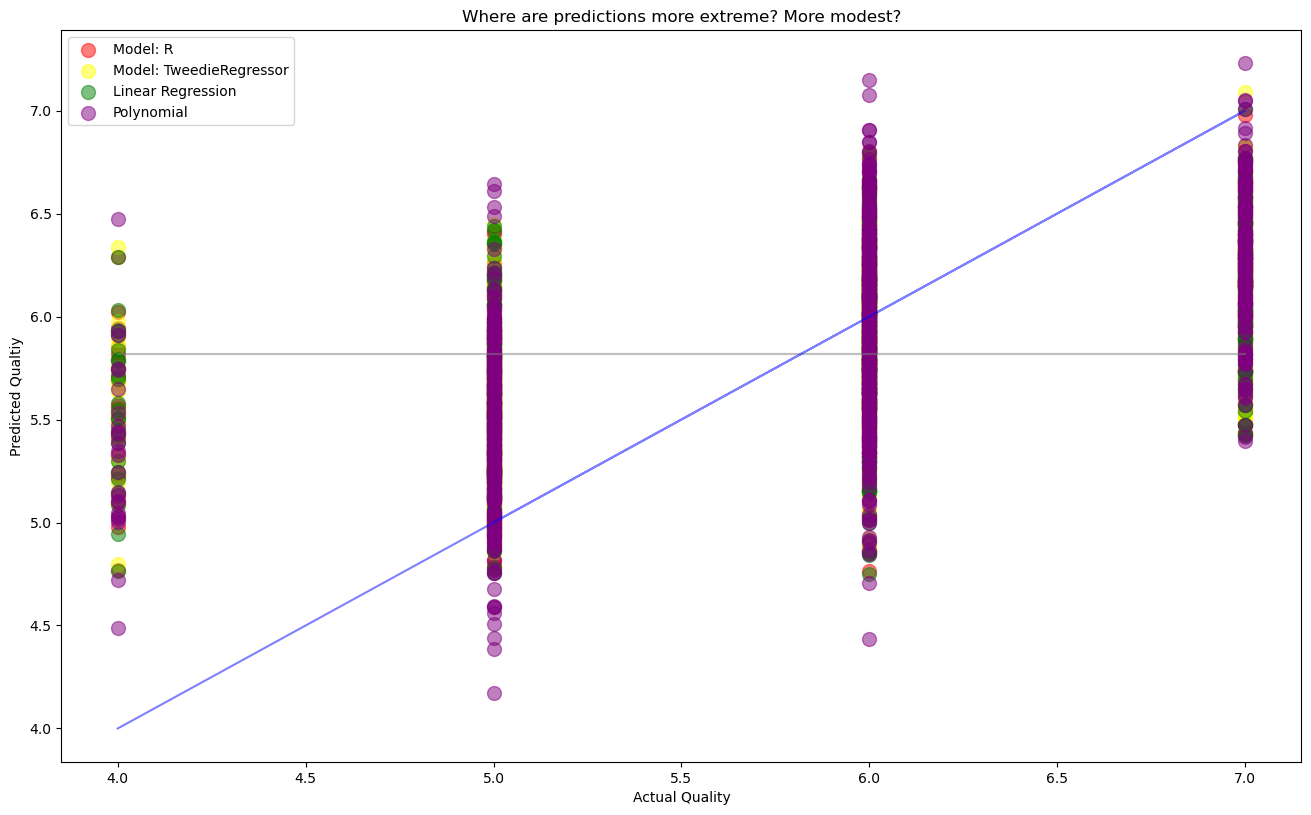

In [31]:
# y_validate.head()
plt.figure(figsize=(16,9.5))
plt.plot(y_validate.quality, y_validate.quality_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.quality, y_validate.quality, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.quality, y_validate.quality_pred_R, 
            alpha=.5, color="red", s=100, label="Model: R")
plt.scatter(y_validate.quality, y_validate.quality_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.quality, y_validate.quality_pred_lm, 
            alpha=.5, color="green", s=100, label="Linear Regression")
plt.scatter(y_validate.quality, y_validate.quality_pred_lm2, 
            alpha=.5, color="purple", s=100, label="Polynomial")   
    
plt.legend()
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Qualtiy")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

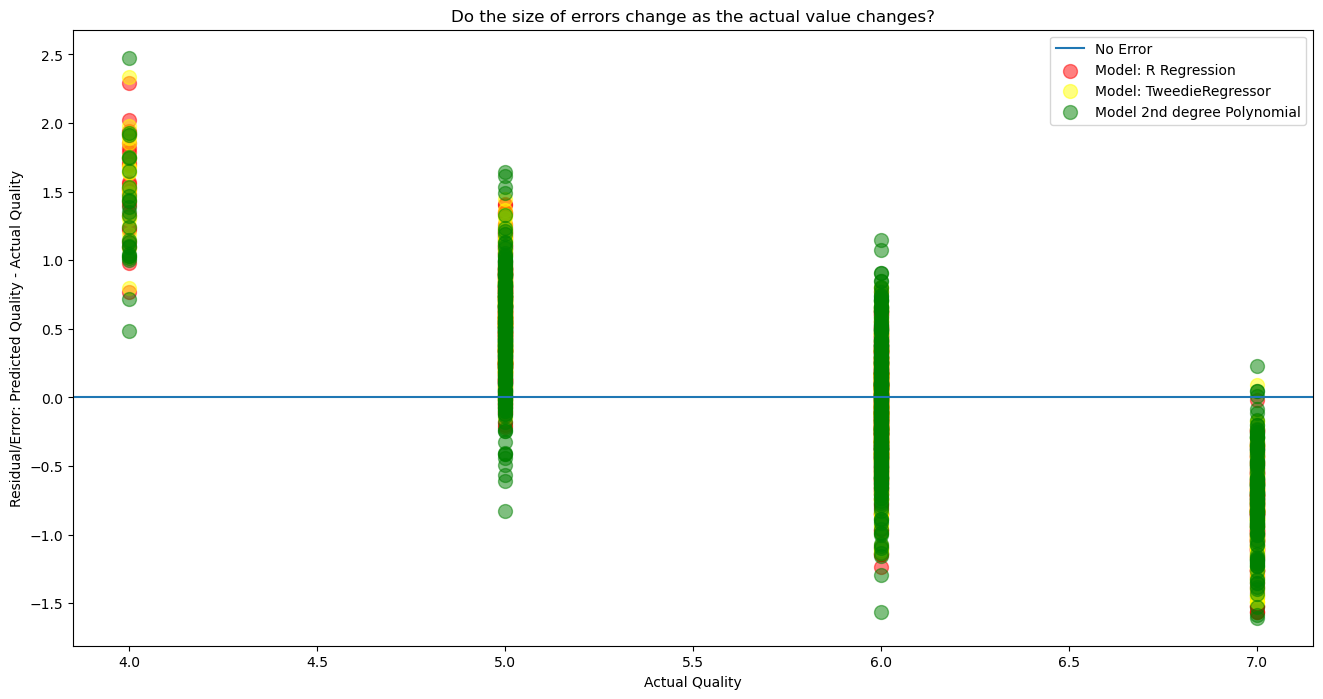

In [32]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.quality, y_validate.quality_pred_R-y_validate.quality, 
            alpha=.5, color="red", s=100, label="Model: R Regression")
plt.scatter(y_validate.quality, y_validate.quality_pred_glm-y_validate.quality, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.quality, y_validate.quality_pred_lm2-y_validate.quality, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Quality")
plt.ylabel("Residual/Error: Predicted Quality - Actual Quality")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


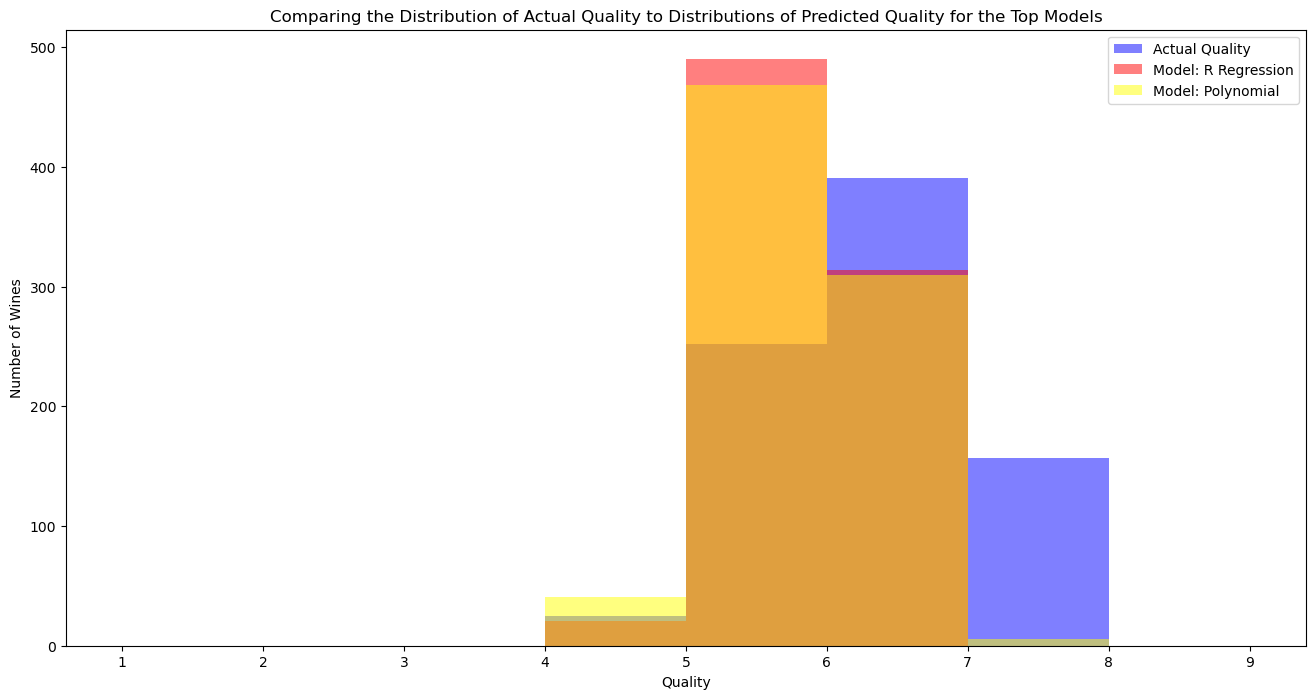

In [40]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.quality, color='blue', alpha=.5, label="Actual Quality", bins=range(1,10))
plt.hist(y_validate.quality_pred_R, color='red', alpha=.5, label="Model: R Regression", bins=range(1,10))
plt.hist(y_validate.quality_pred_lm2, color='yellow', alpha=.5, label="Model: Polynomial", bins=range(1,10))
#plt.hist(y_validate.quality_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial", bins=range(1,10)
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.title("Comparing the Distribution of Actual Quality to Distributions of Predicted Quality for the Top Models")
plt.legend()
plt.show()


In [34]:
y_test = pd.DataFrame(y_test)
# predict on test
y_test['quality_pred_lm2'] = lm2.predict(X_test_degree2)
y_test['quality_pred_lm2'] = y_test['quality_pred_lm2']
# evaluate: rmse
rmse_test = mean_squared_error(y_test.quality, y_test.quality_pred_lm2)**(1/2)
print("RMSE for OLS Model using Polynomial Regression\nOut-of-Sample Performance: ", rmse_test)


RMSE for OLS Model using Polynomial Regression
Out-of-Sample Performance:  0.5867941962123282


In [35]:
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean)**(1/2)
lm_base_ratio = (rmse_test/rmse_validate)*100
print(f"""Polynomial Model decreased errors by {round(100-lm_base_ratio,2)}%""")

Polynomial Model decreased errors by 23.35%
